In [165]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [166]:
data = pd.read_csv("Maternal Health Risk Data Set.xls")
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [167]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [169]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [170]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [171]:
for col in data.columns:
    print(f"{col } :  {data[col].nunique()}")

Age :  50
SystolicBP :  19
DiastolicBP :  16
BS :  29
BodyTemp :  8
HeartRate :  16
RiskLevel :  3


In [172]:
for col in data.columns:
    print(f"{col } :  {data[col].unique()}")
    print("/n")

Age :  [25 35 29 30 23 32 42 19 20 48 15 50 10 40 21 18 16 22 49 28 12 60 55 45
 31 17 26 54 44 33 13 34 38 39 63 14 37 51 62 43 65 66 56 70 27 36 59 24
 41 46]
/n
SystolicBP :  [130 140  90 120  85 110  70 100  75  95  76  80 115 135 160 129  83  99
  78]
/n
DiastolicBP :  [ 80  90  70  85  60  89  75 100  50  65  95  49  63  69  76  68]
/n
BS :  [15.   13.    8.    7.    6.1   7.01 11.    6.9  18.    6.7   7.5   7.2
  7.1   6.4   9.    6.    7.7  12.   16.    7.8   6.8   7.9  17.   19.
 10.    6.3   6.6   6.5   7.6 ]
/n
BodyTemp :  [ 98.  100.  102.  101.  103.   98.4  99.   98.6]
/n
HeartRate :  [86 70 80 76 78 77 88 90 66 82 60 75 67 65 68  7]
/n
RiskLevel :  ['high risk' 'low risk' 'mid risk']
/n


In [173]:
num_col = [feature for feature in data.columns if data[feature].dtype !="O"]
num_col

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

In [174]:
cat_col = [feature for feature in data.columns if data[feature].dtype =="O"]
cat_col

['RiskLevel']

<Axes: xlabel='RiskLevel'>

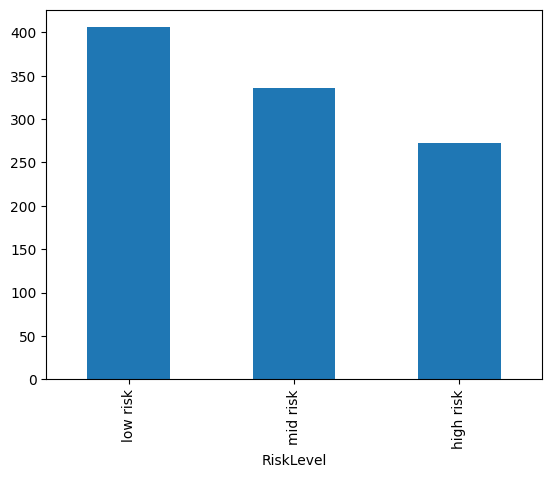

In [175]:
data['RiskLevel'].value_counts().plot(kind="bar")

In [176]:
data['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [177]:
data['RiskLevel'] = np.where(data['RiskLevel']=="high risk",2,
                             np.where(data['RiskLevel']=="mid risk",1,0))

In [178]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [179]:
from scipy.stats import pearsonr

reject_null = []
fail_to_reject = []

for col in num_col:
    _,p_value = pearsonr(data[col],data["RiskLevel"])
    if p_value < 0.05:
        reject_null.append(col)
    else:
        fail_to_reject.append(col)
        
            

In [180]:
reject_null

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

In [181]:
fail_to_reject

[]

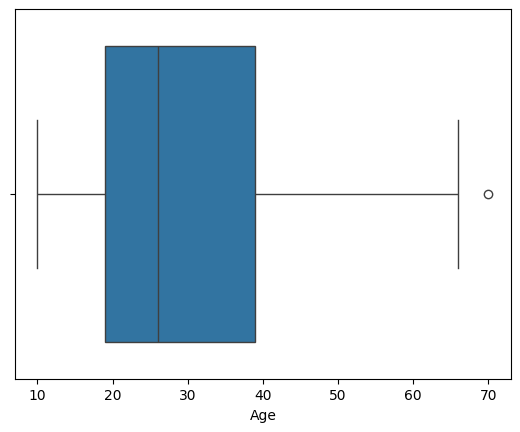

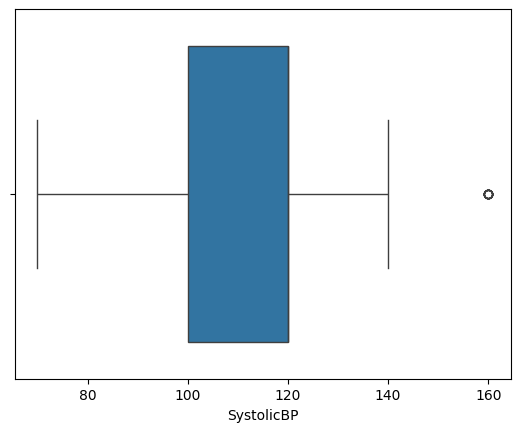

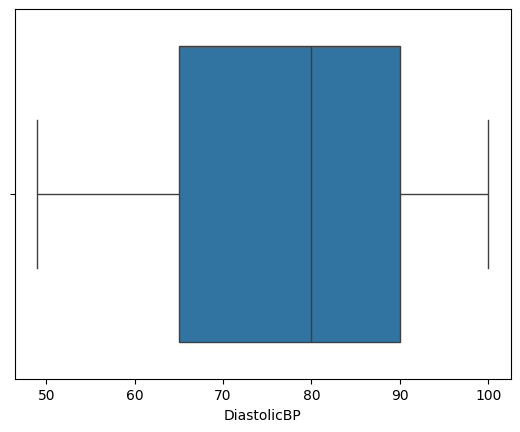

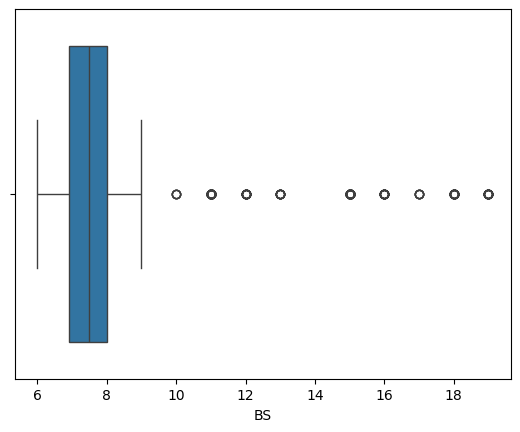

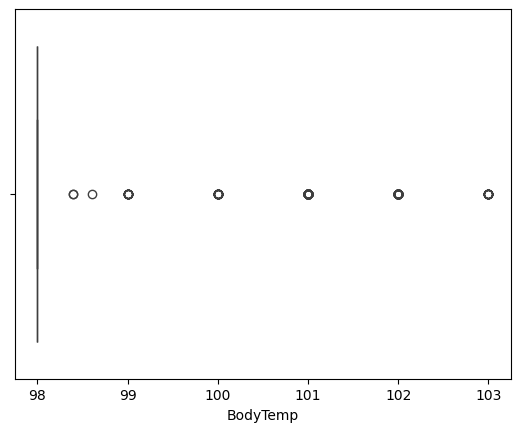

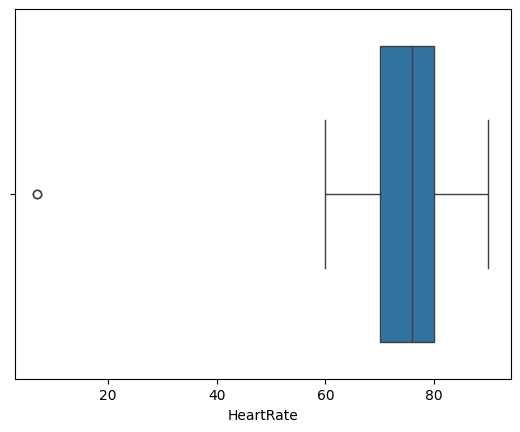

In [182]:
for col in num_col:
    sns.boxplot(data,x=col,fill=True)
    plt.show()
    

In [183]:
data.shape

(1014, 7)

In [184]:
def remove_out(data,col):
    Q1 = np.percentile(data[col],25)
    Q3 = np.percentile(data[col],75)
    IQR = Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 +1.5 *IQR
    data = data[(data[col] > lower) & (data[col] < upper)]
    print(data.shape)
    return data

In [185]:
num_col

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

In [186]:
num_col = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

In [187]:
data = remove_out(data,'Age')

(1013, 7)


In [188]:
data = remove_out(data,'SystolicBP')

(996, 7)


In [189]:
data = remove_out(data,'BS')

(796, 7)


In [190]:
data = remove_out(data,'HeartRate')

(794, 7)


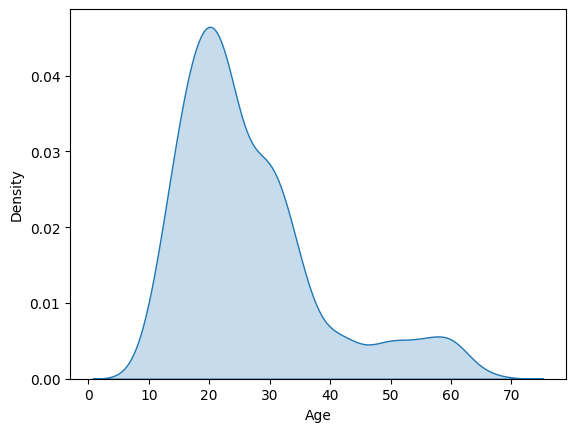

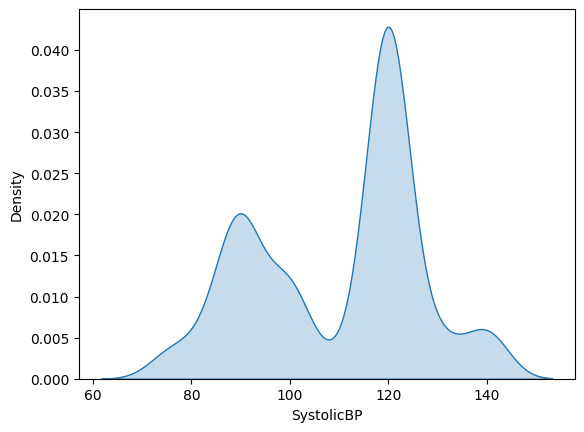

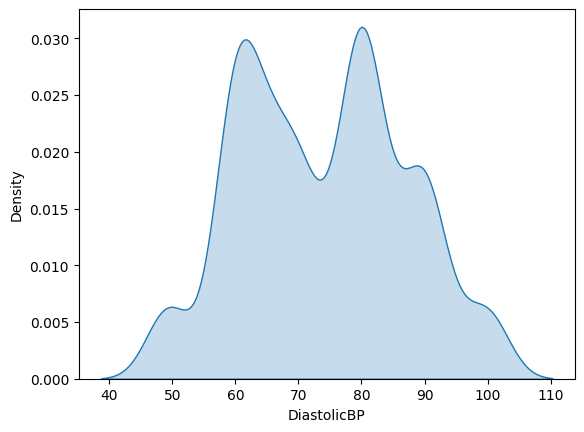

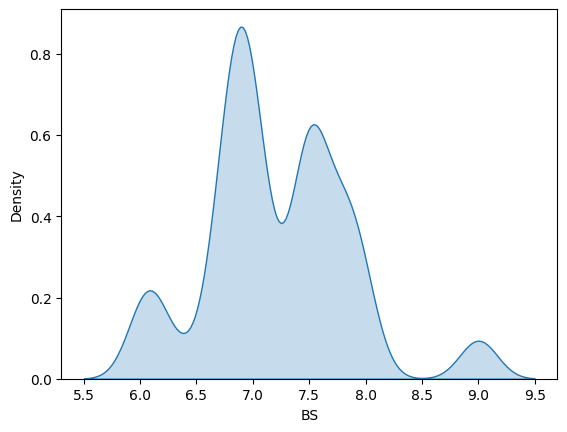

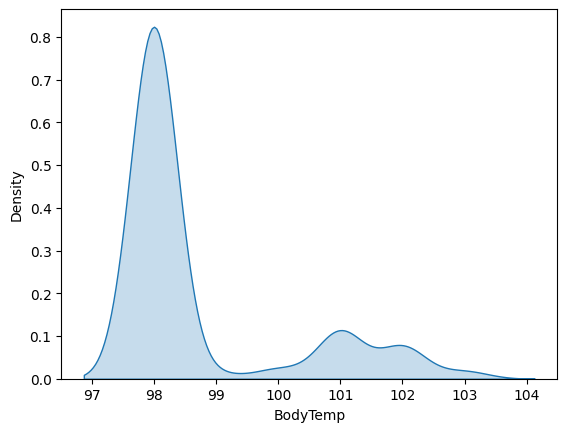

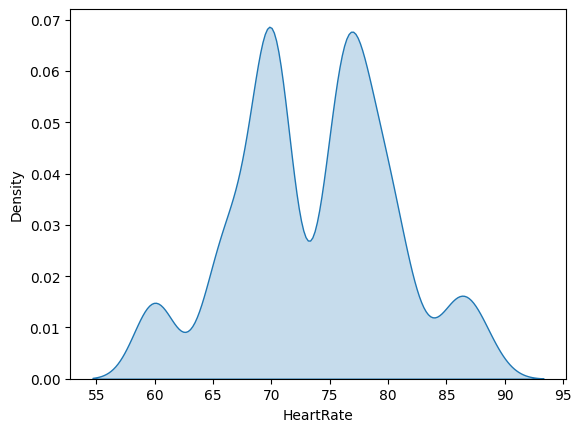

In [191]:
for i in num_col:
    sns.kdeplot(data,x=i,fill=True)
    plt.show()

In [192]:
for i in num_col:
    print(f"{i} skew value {data[i].skew()}")

Age skew value 1.318856262406932
SystolicBP skew value -0.28640033519750785
DiastolicBP skew value 0.08970338930158192
BS skew value 0.48179851942038177
BodyTemp skew value 1.6155526947527477
HeartRate skew value -0.02154000414446766


In [193]:
power_col = ["Age", "BodyTemp"]

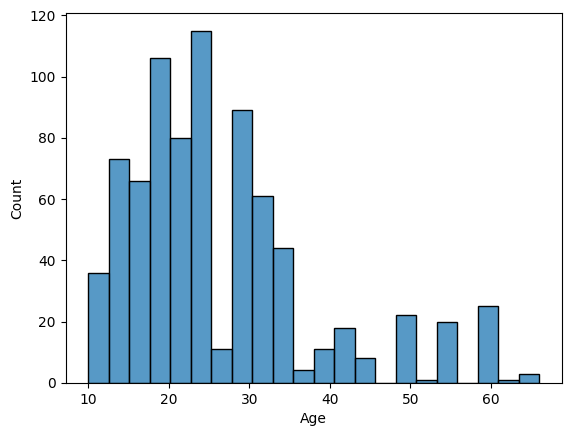

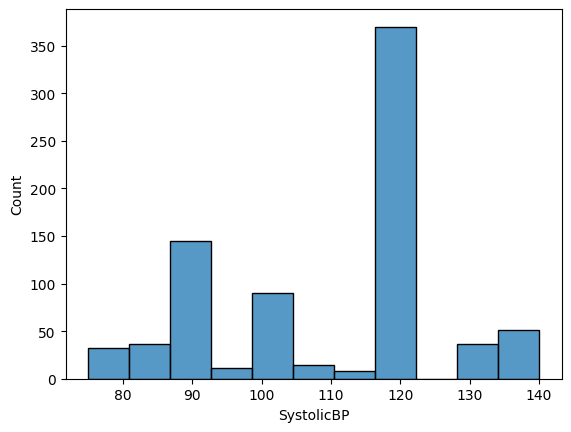

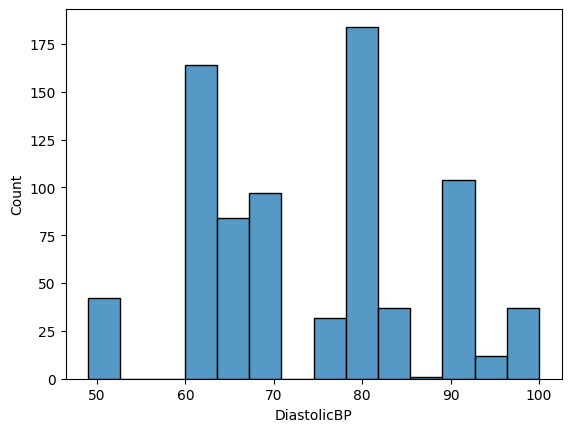

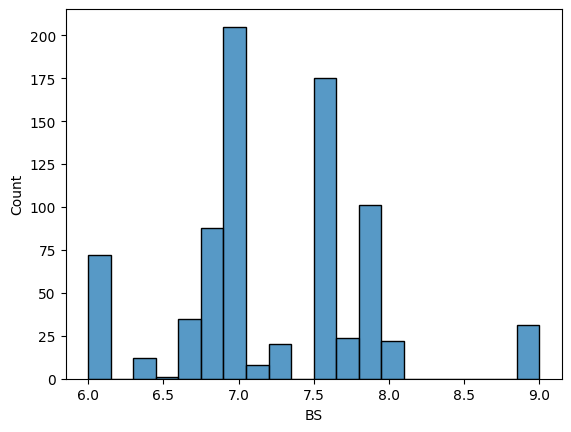

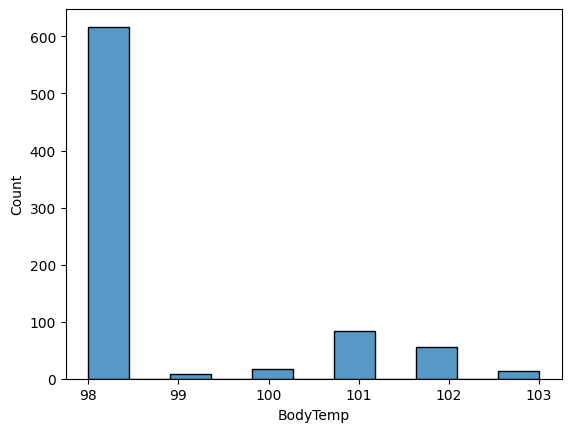

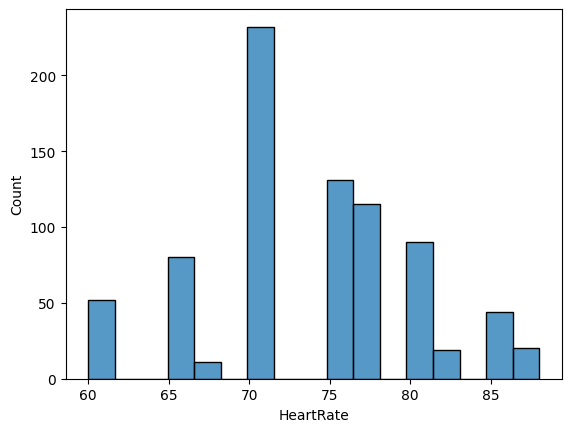

In [194]:
for i in num_col:
    sns.histplot(data,x=i)
    plt.show()

In [195]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [196]:
num_pipeline = Pipeline([
    ("num_pipeline",StandardScaler())
])

power_pipeline = Pipeline([
    ('power_pipeline',PowerTransformer(method="yeo-johnson"))
])

preprocessor = ColumnTransformer([
    ("power",power_pipeline,power_col),
    ("num",num_pipeline,num_col)
])

In [197]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [198]:
X = data.drop(columns="RiskLevel",axis=1)
y = data['RiskLevel']

In [199]:
X.head(1)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
2,29,90,70,8.0,100.0,80


In [200]:
y

2       2
3       2
4       0
5       2
6       1
       ..
1004    2
1005    2
1006    2
1007    2
1013    1
Name: RiskLevel, Length: 794, dtype: int32

In [201]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [202]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [203]:
from imblearn.combine import SMOTETomek, SMOTEENN
smt = SMOTEENN(random_state=42,sampling_strategy='auto' )
X_train_re,y_train_re = smt.fit_resample(X_train, y_train)

In [204]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Function to evaluate classification models
def evaluate_clf(true, predicted, predicted_proba, is_multiclass):
    acc = accuracy_score(true, predicted)  
    f1 = f1_score(true, predicted, average="weighted")  
    precision = precision_score(true, predicted, average="weighted")
    recall = recall_score(true, predicted, average="weighted")  
    
    # Adjust roc_auc calculation based on the number of classes
    if is_multiclass:
        roc_auc = roc_auc_score(true, predicted_proba, multi_class="ovr", average="weighted")  
    else:
        roc_auc = roc_auc_score(true, predicted_proba[:, 1])  

    return acc, f1, precision, recall, roc_auc

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "AdaBoost Classifier": AdaBoostClassifier()
}

# Function to evaluate multiple models
def evaluate_models(X, y, models):
    '''
    This function takes in X, y, and a dictionary of models.
    It splits the data into a train-test split.
    Iterates through the models, evaluates them, and returns a DataFrame with the results.
    '''
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model_names = []
    accuracy_list = []
    auc_list = []
    
    is_multiclass = len(np.unique(y)) > 2  # Check if the target is multiclass
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Get probability scores
        y_train_proba = model.predict_proba(X_train) if hasattr(model, "predict_proba") else None
        y_test_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision, model_train_recall, model_train_rocauc = \
            evaluate_clf(y_train, y_train_pred, y_train_proba, is_multiclass)

        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision, model_test_recall, model_test_rocauc = \
            evaluate_clf(y_test, y_test_pred, y_test_proba, is_multiclass)

        print(f"Model: {model_name}")
        model_names.append(model_name)

        print('Training Performance:')
        print(f"- Accuracy: {model_train_accuracy:.4f}")
        print(f"- F1 score: {model_train_f1:.4f}") 
        print(f"- Precision: {model_train_precision:.4f}")
        print(f"- Recall: {model_train_recall:.4f}")
        print(f"- ROC AUC Score: {model_train_rocauc:.4f}")

        print('----------------------------------')

        print('Test Performance:')
        print(f"- Accuracy: {model_test_accuracy:.4f}")
        accuracy_list.append(model_test_accuracy)
        print(f"- F1 score: {model_test_f1:.4f}")
        print(f"- Precision: {model_test_precision:.4f}")
        print(f"- Recall: {model_test_recall:.4f}")
        print(f"- ROC AUC Score: {model_test_rocauc:.4f}")
        auc_list.append(model_test_rocauc)
        print("=" * 35)
    
    report = pd.DataFrame(list(zip(model_names, accuracy_list, auc_list)), columns=['Model Name', 'Accuracy', 'ROC AUC'])
    return report.sort_values(by=['Accuracy'], ascending=False)

# Example usage
# Assuming X_train_re and y_train_re are defined
base_model_report = evaluate_models(X=X_train_re, y=y_train_re, models=models)
print(base_model_report)


Model: Random Forest
Training Performance:
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Test Performance:
- Accuracy: 0.9832
- F1 score: 0.9833
- Precision: 0.9840
- Recall: 0.9832
- ROC AUC Score: 0.9995
Model: Decision Tree
Training Performance:
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Test Performance:
- Accuracy: 0.9664
- F1 score: 0.9664
- Precision: 0.9666
- Recall: 0.9664
- ROC AUC Score: 0.9747
Model: Gradient Boosting
Training Performance:
- Accuracy: 0.9915
- F1 score: 0.9916
- Precision: 0.9916
- Recall: 0.9915
- ROC AUC Score: 1.0000
----------------------------------
Test Performance:
- Accuracy: 0.9832
- F1 score: 0.9832
- Precision: 0.9832
- Recall: 0.9832
- ROC AUC Score: 0.9971
Model: Logistic Regression
Training Performance:
- Accuracy: 0.6702
- F1 score: 0.6525
- Precision: 0.6509
- Recal

In [205]:
base_model_report

,Model Name,Accuracy,ROC AUC
0,Random Forest,0.983193,0.999546
2,Gradient Boosting,0.983193,0.997068
5,XGBClassifier,0.983193,1.000000
1,Decision Tree,0.966387,0.974675
4,K-Neighbors Classifier,0.915966,0.987237
6,Support Vector Classifier,0.865546,0.955304
7,AdaBoost Classifier,0.764706,0.907792
3,Logistic Regression,0.613445,0.793369


In [206]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [207]:

# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [208]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_train_re, y_train_re)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

d:\anaconda\envs\ml_genai\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits


d:\anaconda\envs\ml_genai\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits


d:\anaconda\envs\ml_genai\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 5}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 12}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}


In [209]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 5},
 'RF': {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 12},
 'KNN': {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}}

In [210]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_train_re, y=y_train_re, models=best_models)

Model: Random Forest Classifier
Training Performance:
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Test Performance:
- Accuracy: 0.9916
- F1 score: 0.9916
- Precision: 0.9918
- Recall: 0.9916
- ROC AUC Score: 0.9995
Model: KNeighborsClassifier
Training Performance:
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Test Performance:
- Accuracy: 0.9832
- F1 score: 0.9831
- Precision: 0.9837
- Recall: 0.9832
- ROC AUC Score: 1.0000
Model: XGBClassifier
Training Performance:
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Test Performance:
- Accuracy: 0.9916
- F1 score: 0.9916
- Precision: 0.9918
- Recall: 0.9916
- ROC AUC Score: 0.9989


In [211]:
tuned_report

,Model Name,Accuracy,ROC AUC
0,Random Forest Classifier,0.991597,0.999494
2,XGBClassifier,0.991597,0.998883
1,KNeighborsClassifier,0.983193,1.000000


In [212]:
from sklearn.metrics import classification_report
best_model = XGBClassifier(**model_param['XGBoost'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'XGBoost'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'XGBoost'
Accuracy Score value: 0.8239
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        84
           1       0.74      0.86      0.80        59
           2       1.00      0.75      0.86        16

    accuracy                           0.82       159
   macro avg       0.87      0.81      0.83       159
weighted avg       0.84      0.82      0.83       159



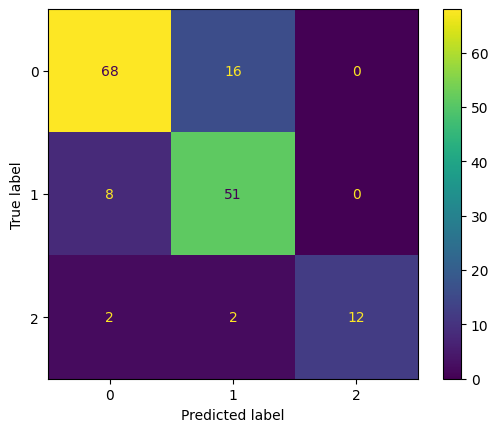

In [213]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

In [214]:
from langchain_groq import ChatGroq
from langchain.chains import create_retrieval_chain,LLMChain,RetrievalQA
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.prompts import ChatPromptTemplate,PromptTemplate
from langchain_community.vectorstores import FAISS
import os
from dotenv import load_dotenv

In [215]:
load_dotenv()
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

In [216]:
prompt_template = PromptTemplate(
    input_variables=["input_data", "prediction"],
    template="""
    You are a Mental Health Risk Medical Assistant. Your role is to explain why a specific risk level (2 is High, 1 is Middle, or 0 is Low) was predicted based on the user's input and provide simple, actionable suggestions to address it. Use easy-to-understand language and focus on the most relevant factors contributing to the risk level.

    ### **Patient Data & Risk Level Prediction:**
    - Input Data: {input_data}
    - Predicted Risk Level: {prediction}

    ### **Steps to Follow:**
    1. **Explain the Risk Level**: Briefly describe why the user's input led to the predicted risk level. Highlight the most significant factors (Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate) that contributed to the prediction.
    2. **Provide Suggestions**: Offer clear, practical, and personalized recommendations based on the risk level. Include food suggestions, entertainment ideas, if the user is at High or Middle risk. If the user is at Low risk, provide a positive greeting and general wellness tips.

    ### **Example Format:**
    - **Risk Level**: [High/Middle/Low]
    - **Why This Happened**: [Brief explanation of the risk factors.]
    - **Suggestions**: [Actionable steps, food suggestions]

    ### **Response:**
    """
)
llm = ChatGroq(temperature=0.5, groq_api_key=GROQ_API_KEY, model_name="mixtral-8x7b-32768")

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  
import joblib


column_names = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']


input_data = [[35,120,60,6.1,98,76]]  


input_data_df = pd.DataFrame(input_data, columns=column_names)

preprocessor = joblib.load('preprocess.pkl')  
best_model = joblib.load('model.pkl')   
rag_chain = LLMChain(llm=llm, prompt=prompt_template)

input_data_processed = preprocessor.transform(input_data_df)


prediction = best_model.predict(input_data_processed)


print("Prediction:", prediction)
response = rag_chain.invoke({"input_data": input_data, "prediction": prediction})
print(response["text"])


Prediction: [0]
**Risk Level:** [0] - Low

**Why This Happened:** Your input data indicates a low risk level. Your age, blood pressure, blood sugar, body temperature, and heart rate are within normal ranges. This is a positive sign!

**Suggestions:** Keep up the great work! To maintain your well-being, consider incorporating these general wellness tips into your daily routine:

1. Stay hydrated by drinking at least 8 glasses of water a day.
2. Aim for at least 30 minutes of moderate physical activity, such as walking or cycling, most days of the week.
3. Get 7-8 hours of sleep each night.
4. Practice stress management techniques like deep breathing, meditation, or yoga.
5. Enjoy a balanced diet with plenty of fruits, vegetables, lean proteins, and whole grains.

Keep in mind that these are general suggestions, and it's always a good idea to consult with a healthcare professional for personalized advice. Have a wonderful day!
